<a href="https://colab.research.google.com/github/sujan123123/CNN/blob/master/UnderstandingTypesOfConvolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-image

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.6/dist-packages (0.17.2)


In [3]:
pip install opencv-python

In [4]:
clear


In [0]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

In [0]:
def convolve(image,kernel):
  (iH,iW) = image.shape[:2]
  (kH,kW) = kernel.shape[:2]

  pad = (kW -1) // 2
  image = cv2.copyMakeBorder(image,pad,pad,pad,pad,cv2.BORDER_REPLICATE)
  output = np.zeros((iW,iH), dtype='float32')

  for y in np.arange(pad,iH+pad):
    for x in np.arange(pad,iW+pad):

      roi = image[y-pad:y-pad+1,x-pad:x+pad+1]

      k = (roi * kernel).sum()

      output[y-pad,x-pad] = k

  output = rescale_intensity(output,in_range=(0,255))
  output = (output * 255).astype("uint8")

  return output

In [0]:
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

In [0]:
sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")
# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

In [0]:
kernelBank = (
	("small_blur", smallBlur),
	("large_blur", largeBlur),
	("sharpen", sharpen),
	("laplacian", laplacian),
	("sobel_x", sobelX),
	("sobel_y", sobelY)
)

[INFO] applying small_blur kernel


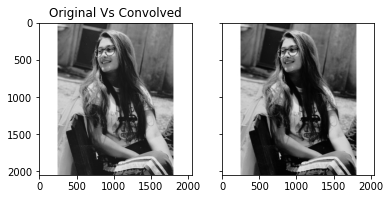

[INFO] applying large_blur kernel


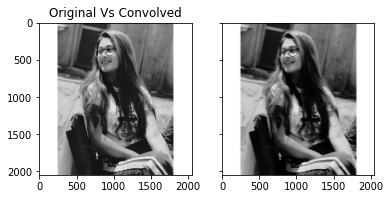

[INFO] applying sharpen kernel


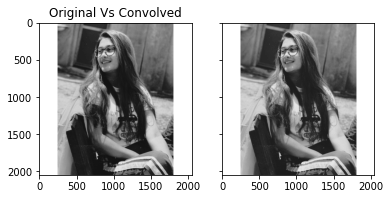

[INFO] applying laplacian kernel


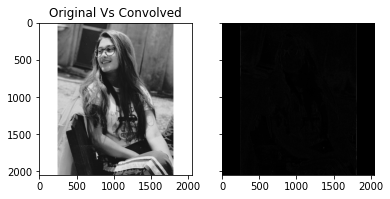

[INFO] applying sobel_x kernel


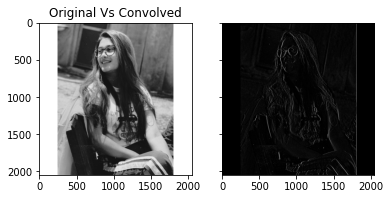

[INFO] applying sobel_y kernel


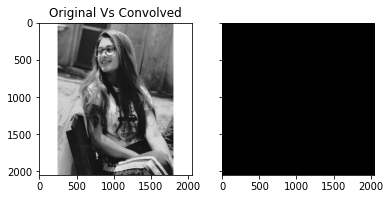

In [6]:
import urllib
import matplotlib.pyplot as plt

def url_to_image(url):
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image
image = url_to_image("https://scontent.fktm8-1.fna.fbcdn.net/v/t1.0-9/91701130_2877081089066196_8527773053583622144_o.jpg?_nc_cat=109&_nc_sid=09cbfe&_nc_ohc=4allE0_hJ4MAX9ri6oy&_nc_ht=scontent.fktm8-1.fna&oh=cb211657c23e6e683444356f0a73abf7&oe=5EEB5DE0")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# loop over the kernels
for (kernelName,kernel) in kernelBank:
 print("[INFO] applying {} kernel".format(kernelName))
 convoleOutput = convolve(gray, kernel)
 opencvOutput = cv2.filter2D(gray, -1, kernel)
 f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
 ax1.imshow(gray, cmap='gray')
 ax1.set_title('Original Vs Convolved')
 ax2.imshow(convoleOutput, cmap='gray')
 plt.show()
